Basic LinearRegression model to apply my recent learning. No feature creation

Update: I was excited to try and apply what I learnt about LinearRegression, I later learnt this is a logistic Regression problem. Updating algo to logistic regressions

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [91]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
target = train['Survived']

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
def clean_data(df):
    df = df.drop('Cabin', axis=1)
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Age'] = df['Age'].fillna(train['Age'].median())
    return df

In [94]:
def create_features(df, features):
    # Create a feature for name titles
    names = df['Name'].str.split().tolist()
    title_list = []
    for i in range(0, len(names)):
        title_list.append(names[i][1])
    df['Title'] = title_list
    df = df.drop('Name', axis=1)
    
    ## Ages to groups
    groups = pd.cut(df['Age'], bins=5)
    df = df.drop('Age', axis=1)
    df = pd.concat([df,groups], axis=1)

    ## Fares to groups
    groups = pd.cut(df['Fare'], bins=4)
    df = df.drop('Fare', axis=1)
    df = pd.concat([df,groups], axis=1)
    
    ## Dummy columns for features
    df = df[features]
    for col in features:
        df[col] = df[col].astype('category')
        col_dummies = pd.get_dummies(df[col])
        df = pd.concat([df,col_dummies], axis=1)
        del df[col]
    
    return(df)

In [95]:
def train_model(train):
    features = train.columns.tolist()
    features.remove('Survived')
    
    lr = LogisticRegression()

    X = train[features]
    y = train['Survived']

    #X_test = test[features]
    #y_test = test['Survived']
    
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, shuffle=True)
        
        lr.fit(X_train, y_train)
        
        predictions = lr.predict(X_test)
        
        # Hack I was using for linear regression
        #new_predictions = []
        #for i in predictions:
        #    if i > 0.5: 
        #        new_predictions.append(1)
        #    else:
        #        new_predictions.append(0)


        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)

        # In this case MSE is the portion of correct answer to wrong ones
        print(1 - mse)
        print('rmse:{}'.format(rmse))
        print('***')

In [165]:
features = ['Sex', 'Title', 'Pclass', 'Age', 'Embarked']

train_df = clean_data(train)
train_df = create_features(train, features)
train_df = pd.concat([train_df,target], axis=1)
print('Model Accuracy:')
train_model(train_df)

Model Accuracy:
0.827118644068
rmse:0.4157900382791817
***
0.793220338983
rmse:0.4547303167999129
***
0.8
rmse:0.4472135954999579
***
0.810169491525
rmse:0.435695430862634
***
0.786440677966
rmse:0.4621247905424446
***
0.793220338983
rmse:0.4547303167999129
***
0.810169491525
rmse:0.435695430862634
***
0.810169491525
rmse:0.435695430862634
***
0.806779661017
rmse:0.43956835530216554
***
0.783050847458
rmse:0.46577800779166556
***


81.14% Of predictions were correct.

## Data Exploration and Cleaning

In [97]:
# find null data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [98]:
#We have missing data in 3 columns we need to deal with.

## Age - use median age, but we could improve on this a lot.
## Cabin has lots of missing values.  Drop
## Embarked only has 2 missing values. We'll fill it with the most common of all values

In [99]:
## Feature creatation with Name
#names = train['Name'].str.split().tolist()
#title_list = []
#for i in range(0, len(names)):
#    title_list.append(names[i][1])
#train['title'] = title_list

In [100]:
#train['title'] = title_list

In [101]:
#train['title'].unique()

In [102]:
#train['title'].value_counts()

titles that represent sex, don't offer much extra info. we are really interested the effect of being a dr or master (for example)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [155]:
df = train
df = clean_data(df)
# Create a feature for name titles
names = df['Name'].str.split().tolist()
title_list = []
for i in range(0, len(names)):
    title_list.append(names[i][1])
df['Title'] = title_list
df = df.drop('Name', axis=1)

## Ages to groups
labels = [1,2,3,4,5]
groups = pd.cut(df['Age'], bins=5, labels=labels)
df = df.drop('Age', axis=1)
df = pd.concat([df,groups], axis=1)
df['Age'] = pd.Series(df['Age'], dtype='int64')

## Fares to groups
labels = [1,2,3,4]
groups = pd.cut(df['Fare'], bins=4, labels=labels)
df = df.drop('Fare', axis=1)
df = pd.concat([df,groups], axis=1)
df['Fare'] = pd.Series(df['Fare'], dtype='int64')

## Sex to groups
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

## Ticket to groups
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['Ticket'] = le.fit_transform(df['Ticket'])

## Cabin to groups
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

## Cabin to groups
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])

df = df.drop('PassengerId', axis=1)

In [156]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Title,Age,Fare
0,0,3,1,1,0,523,2,17,2,1
1,1,1,0,1,0,596,0,18,3,1
2,1,3,0,0,0,669,2,14,2,1
3,1,1,0,1,0,49,2,18,3,1
4,0,3,1,0,0,472,2,17,3,1


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
Age         891 non-null int64
Fare        891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


In [158]:
corr_df = df.corr()
sorted_corrs = corr_df['Survived'].abs().sort_values(ascending=True)
sorted_corrs

SibSp       0.035322
Age         0.043800
Parch       0.081629
Title       0.130118
Fare        0.147466
Ticket      0.164549
Embarked    0.167675
Pclass      0.338481
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

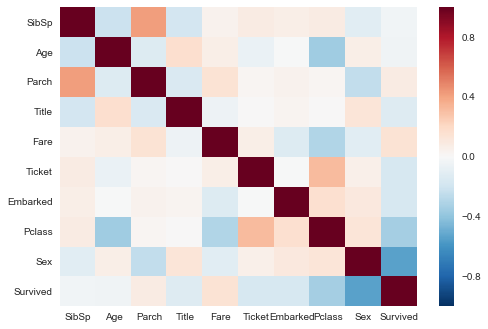

In [161]:
corrmat = df[sorted_corrs.index].corr()
sns.heatmap(corrmat)
plt.show()

In [54]:
## Pclass and Fare have a strong correlation. 
## We should only use one of them.
## Pclass and age are also pretty related
## As a result, maybe drop pclass and onlu use age and fare?
## My assumption is rich kids had a pclass of 1, but a cheap fare.